# GRAPE calculation of control fields for bell state implementation

Robert Johansson (robert@riken.jp)

In [375]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np
from numpy import pi

from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_bloch_multivector

In [355]:
from qutip import *
qutip.settings.auto_tidyup = False

In [356]:
T = 2
times = np.linspace(0, T, 200)

In [357]:
#U = bell_state(state='00')

R = 100
H_ops = [# qubit 1: single-qubit control
         tensor(sigmax(), identity(2)),
         tensor(sigmay(), identity(2)),
         tensor(sigmaz(), identity(2)),
         # qubit 1: single-qubit control
         tensor(identity(2), sigmax()),
         tensor(identity(2), sigmay()),
         tensor(identity(2), sigmaz()),
    
          # # pairwise X-X interactions
             # tensor(sigmax(), sigmax()),
          # # pairwise Y-Y interactions
            # tensor(sigmay(), sigmay()),
          # pairwise Z-Z interactions
           tensor(sigmaz(), sigmaz()),
         ]

H_labels = [r'$u_{1x}$',
            r'$u_{1y}$',
            r'$u_{1z}$',
            
            r'$u_{2x}$',
            r'$u_{2y}$',
            r'$u_{2z}$',
            
             # r'$u_{xx}$',
             # r'$u_{yy}$',
             r'$u_{zz}$',
            

            
#             r'$u_{xxi}$',
#             r'$u_{ixx}$',
#             r'$u_{xix}$',
            
#             r'$u_{yyi}$',
#             r'$u_{iyy}$',
#             r'$u_{yiy}$',
            
#             r'$u_{zzi}$',
#             r'$u_{izz}$',
#             r'$u_{ziz}$',
        ]

In [358]:
H0 = 0 * pi * (tensor(sigmaz(), identity(2)) + 
               tensor(identity(2), sigmaz())) 

c_ops = []
H0

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

In [359]:
U=cnot()*tensor(hadamard_transform(),identity(2))
#U=cnot()
#U=tensor(hadamard_transform(),identity(2))
U

C:\Users\eande\AppData\Local\Temp\ipykernel_24492\2750797325.py:1: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  U=cnot()*tensor(hadamard_transform(),identity(2))


Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.70710678]
 [ 0.          0.70710678  0.         -0.70710678]
 [ 0.70710678  0.         -0.70710678  0.        ]]

# GRAPE

In [360]:
from qutip.control.grape import cy_grape_unitary, grape_unitary_adaptive, plot_grape_control_fields, _overlap

In [361]:
from scipy.interpolate import interp1d
from qutip.ui.progressbar import TextProgressBar

In [362]:
u0 = np.array([np.random.rand(len(times)) * 2 * pi * 0.01 for _ in range(len(H_ops))])

u0 = [np.convolve(np.ones(10)/10, u0[idx,:], mode='same') for idx in range(len(H_ops))]

In [363]:
result = cy_grape_unitary(U, H0, H_ops, R, times, phase_sensitive=False,
                          u_start=u0, progress_bar=TextProgressBar(),
                          eps=2*pi*5)

10.0%. Run time:   6.76s. Est. time left: 00:00:01:00
20.0%. Run time:  12.88s. Est. time left: 00:00:00:51
30.0%. Run time:  19.19s. Est. time left: 00:00:00:44
40.0%. Run time:  25.26s. Est. time left: 00:00:00:37
50.0%. Run time:  32.27s. Est. time left: 00:00:00:32
60.0%. Run time:  39.06s. Est. time left: 00:00:00:26
70.0%. Run time:  45.40s. Est. time left: 00:00:00:19
80.0%. Run time:  51.79s. Est. time left: 00:00:00:12
90.0%. Run time:  57.83s. Est. time left: 00:00:00:06
Total run time:  63.96s


## Plot control fields for the bell entangling gate in the presense of single-qubit tunnelling

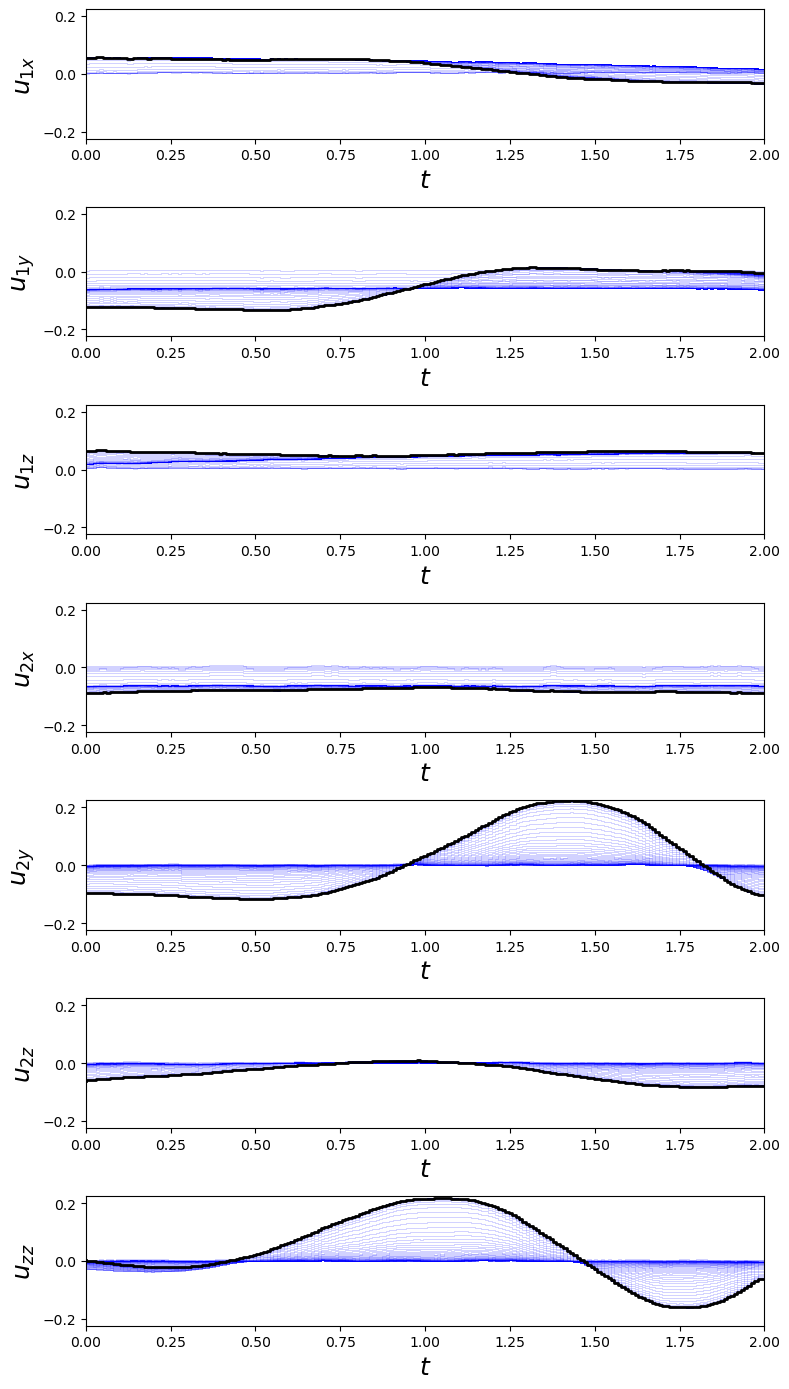

In [364]:
plot_grape_control_fields(times, result.u / (2 * pi), H_labels, uniform_axes=True);

## Fidelity of the resutling GRAPE gate

In [365]:
U

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.70710678]
 [ 0.          0.70710678  0.         -0.70710678]
 [ 0.70710678  0.         -0.70710678  0.        ]]

In [366]:
result.U_f.tidyup(1e-1)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.50041451-0.50028361j  0.        +0.j          0.49943259-0.49985046j
   0.        +0.j        ]
 [ 0.        +0.j          0.49954308-0.49971108j  0.        +0.j
   0.50049378-0.50023314j]
 [ 0.        +0.j          0.50030954-0.50041701j  0.        +0.j
  -0.49978748+0.49946714j]
 [ 0.49977433-0.49950925j  0.        +0.j         -0.50020695+0.50049057j
   0.        +0.j        ]]

In [367]:
result.U_f / result.U_f[0,0] #.tidyup(1e-1)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 1.        +0.j          0.        +0.j          0.99858584-0.00054821j
   0.        +0.j        ]
 [ 0.        +0.j          0.998557  -0.00029851j  0.        +0.j
   1.00002879+0.00012964j]
 [ 0.        +0.j          1.00002838-0.00023821j  0.        +0.j
  -0.99855754-0.0001895j ]
 [ 0.99858646+0.00013428j  0.        +0.j         -0.99999934+0.00041424j
   0.        +0.j        ]]

In [368]:
abs(_overlap(U, result.U_f))**2

0.9999811271004955

## Quantum process tomography of the ideal and GRAPE gates for Bell state


In [405]:
#specify initial state to apply operator to for tomography

initialstate=tensor(basis(2, 0), basis(2, 1)) #initial state
initialstate


Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]

In [406]:
idealfinalstate=U*initialstate
finalstate=result.U_f*initialstate


In [407]:
idealdensitymatrix=(idealfinalstate * idealfinalstate.dag())#ideal density matrix
densitymatrix=(finalstate * finalstate.dag())# real density matrix
print (idealdensitymatrix)
print (densitymatrix)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.  0.  0.  0. ]
 [0.  0.5 0.5 0. ]
 [0.  0.5 0.5 0. ]
 [0.  0.  0.  0. ]]
Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.        +0.00000000e+00j 0.        +0.00000000e+00j
  0.        +0.00000000e+00j 0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j 0.49925445+0.00000000e+00j
  0.49999009-3.03650131e-05j 0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j 0.49999009+3.03650131e-05j
  0.50072682+0.00000000e+00j 0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j 0.        +0.00000000e+00j
  0.        +0.00000000e+00j 0.        +0.00000000e+00j]]


In [402]:
#printing fidelity
fidelity(idealdensitymatrix,densitymatrix)

0.9999908732813423

[[0.50069837+0.00000000e+00j 0.        +0.00000000e+00j
  0.        +0.00000000e+00j 0.49999062-6.72316614e-05j]
 [0.        +0.00000000e+00j 0.        +0.00000000e+00j
  0.        +0.00000000e+00j 0.        +0.00000000e+00j]
 [0.        +0.00000000e+00j 0.        +0.00000000e+00j
  0.        +0.00000000e+00j 0.        +0.00000000e+00j]
 [0.49999062+6.72316614e-05j 0.        +0.00000000e+00j
  0.        +0.00000000e+00j 0.49928387+0.00000000e+00j]]


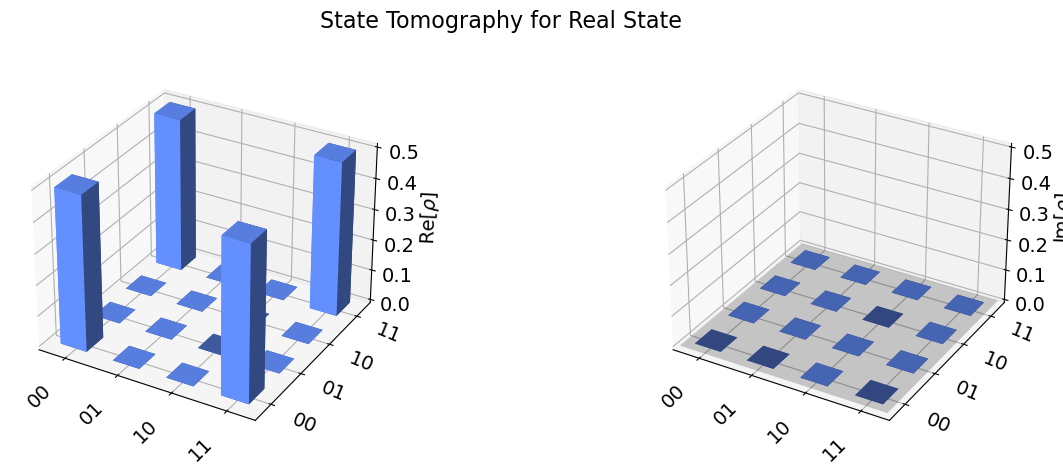

In [403]:
#plotting cityscape for real density matrix
dm=np.array(densitymatrix)
print (dm)
plot_state_city(dm, title='State Tomography for Real State')

[[0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0.5+0.j]]


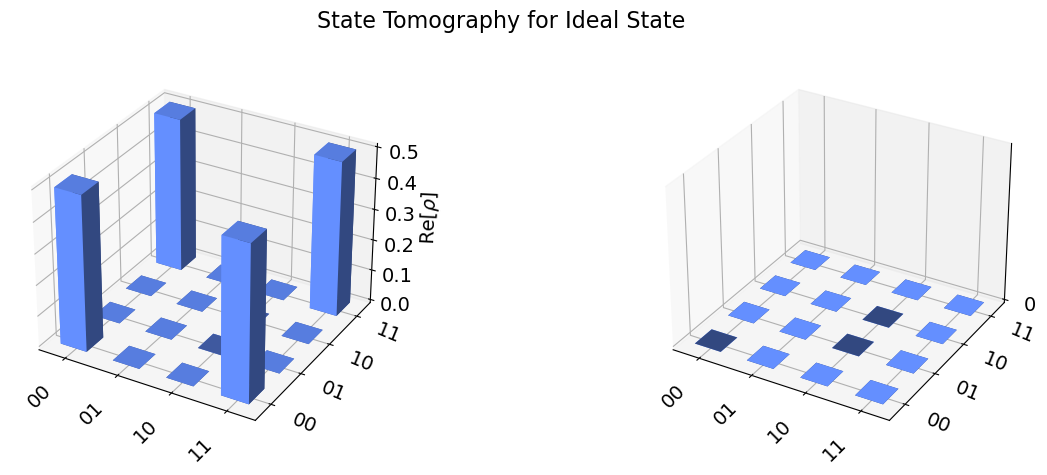

In [404]:
#plotting cityscape for ideal density matrix
idm=np.array(idealdensitymatrix)
print (idm)
plot_state_city(idm, title='State Tomography for Ideal State')

## Versions

In [42]:
from qutip.ipynbtools import version_table

version_table()